# Section 5.1: Feature Selection
## Greedy Approach
By calculating the correlation matrix, we choose a set of features that minimize the interfeature correlation for the features within a group.

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/bpm_25/bpic_features.csv", index_col=None)

X = df.drop(['log'], axis=1)
X = X.loc[:, ~X.columns.str.startswith('trace_len_hist')]

In [3]:
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


In [4]:
scaled_dmf = scaleColumns(X, X.columns)
stats = X.describe().transpose()
#stats = scaled_dmf.describe().transpose()

#print(stats.index)
stats

,count,mean,std,min,25%,50%,75%,max
n_traces,34.0,0.097870,0.213476,0.0,0.003322,0.012379,0.069331,1.0
n_unique_traces,34.0,0.122521,0.249317,0.0,0.006388,0.029981,0.045631,1.0
ratio_unique_traces_per_trace,34.0,0.466611,0.415471,0.0,0.057283,0.386408,0.956895,1.0
trace_len_min,34.0,0.075448,0.181112,0.0,0.000000,0.000000,0.086957,1.0
trace_len_max,34.0,0.091313,0.202147,0.0,0.007823,0.033479,0.049630,1.0
...,...,...,...,...,...,...,...,...
normalized_sequence_entropy,34.0,0.562720,0.266248,0.0,0.377333,0.584977,0.794110,1.0
sequence_entropy_linear_forgetting,34.0,0.066673,0.192074,0.0,0.002935,0.009497,0.019039,1.0
normalized_sequence_entropy_linear_forgetting,34.0,0.573495,0.282912,0.0,0.327994,0.645268,0.792989,1.0
sequence_entropy_exponential_forgetting,34.0,0.067914,0.190191,0.0,0.003186,0.010510,0.017970,1.0


In [5]:
def select_least_corr_features(input_df, num_features=9):
    df = input_df.loc[:,:]

    corr_df = df.corr()
    sel_features = []
    initial_feature = corr_df.abs().describe().transpose().sort_values(by='mean').index[0]
    sel_features.append(initial_feature)
    available_features = set(corr_df.columns) - {initial_feature}

    while len(sel_features) < num_features and available_features:
        # Compute max correlation with selected features
        max_correlations = {
            feature: max(abs(corr_df.loc[sel_features, feature]))
            for feature in available_features
        }
        # Find the feature with the lowest maximum correlation
        next_feature = min(max_correlations, key=max_correlations.get)
        sel_features.append(next_feature)
        available_features.remove(next_feature)
        
    return sel_features

def plot_miner_correlation(input_df):
    #df = input_df.loc[:, input_df.columns.isin(selected_per_category_highest_variance)]
    df = input_df.loc[:,:]
    #df = input_df.loc[:, sorted_features]
    #df = input_df.loc[:, input_df.columns[3:]]
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(25,25)) 
    sns.set(font_scale = 2)
    b= sns.heatmap(corr,
                ax=ax,
                vmin=-1,
                vmax=1,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                )
    plt.yticks(rotation=0) 
    plt.xticks(rotation=60)
    plt.title("Correlation matrix"+str(corr.shape))
    #b.set_yticklabels(b.get_yticks(), size = 15)
    plt.show()
    return corr

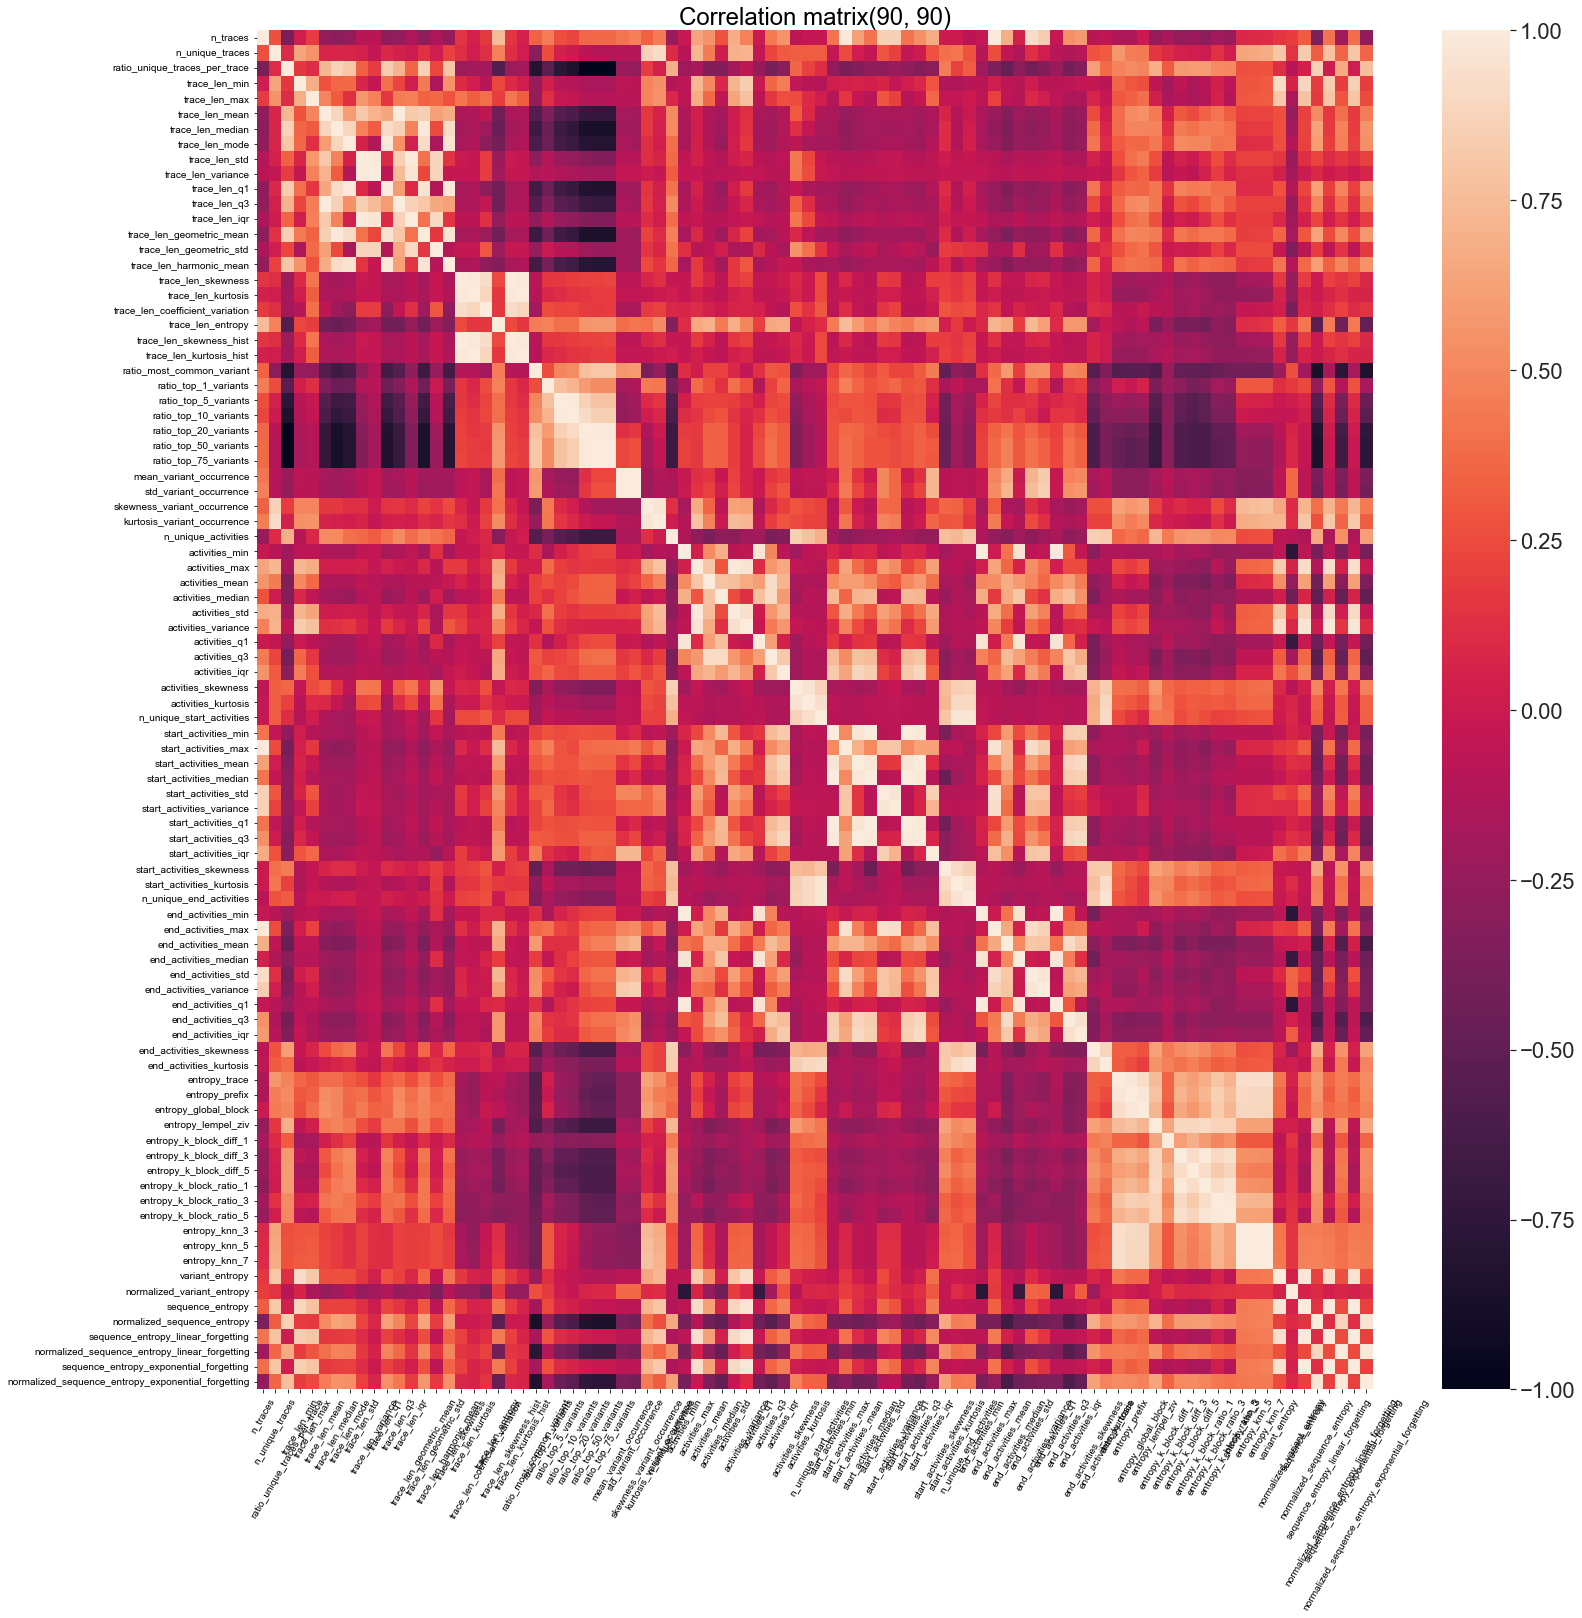

,n_traces,n_unique_traces,ratio_unique_traces_per_trace,trace_len_min,trace_len_max,trace_len_mean,trace_len_median,trace_len_mode,trace_len_std,trace_len_variance,...,entropy_knn_5,entropy_knn_7,variant_entropy,normalized_variant_entropy,sequence_entropy,normalized_sequence_entropy,sequence_entropy_linear_forgetting,normalized_sequence_entropy_linear_forgetting,sequence_entropy_exponential_forgetting,normalized_sequence_entropy_exponential_forgetting
n_traces,1.000000,0.271752,-0.373875,0.018685,0.184282,-0.258241,-0.293836,-0.264319,-0.096144,-0.079168,...,0.094427,0.105201,0.161425,0.190900,0.316599,-0.365291,0.410370,-0.197804,0.384496,-0.269569
n_unique_traces,0.271752,1.000000,0.107624,0.638917,0.554343,0.072870,0.072893,0.070910,0.048955,-0.044517,...,0.659744,0.673903,0.805208,0.145960,0.823861,0.317952,0.786437,0.349613,0.802378,0.344191
ratio_unique_traces_per_trace,-0.373875,0.107624,1.000000,0.169665,0.114528,0.732226,0.872451,0.806604,0.330690,0.183712,...,0.273978,0.277664,0.118248,-0.087990,0.041954,0.855773,0.009492,0.669328,0.019411,0.767008
trace_len_min,0.018685,0.638917,0.169665,1.000000,0.686902,0.279098,0.353631,0.373105,0.077258,-0.046773,...,0.296424,0.304746,0.916876,0.068299,0.889214,0.186384,0.830627,0.190831,0.850904,0.189695
trace_len_max,0.184282,0.554343,0.114528,0.686902,1.000000,0.486117,0.311208,0.130205,0.565477,0.475845,...,0.307449,0.315099,0.816111,-0.160332,0.788275,0.179320,0.798316,0.288732,0.796019,0.249811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
normalized_sequence_entropy,-0.365291,0.317952,0.855773,0.186384,0.179320,0.521106,0.629961,0.598431,0.224358,0.091726,...,0.471831,0.475864,0.205257,0.099134,0.145181,1.000000,0.117152,0.875436,0.126397,0.953262
sequence_entropy_linear_forgetting,0.410370,0.786437,0.009492,0.830627,0.798316,0.165188,0.177269,0.190299,0.106291,-0.005593,...,0.448955,0.459227,0.939322,0.040449,0.984671,0.117152,1.000000,0.251850,0.998385,0.203126
normalized_sequence_entropy_linear_forgetting,-0.197804,0.349613,0.669328,0.190831,0.288732,0.395397,0.478954,0.463857,0.171507,0.049904,...,0.397232,0.401385,0.271197,0.071100,0.241826,0.875436,0.251850,1.000000,0.249133,0.980083
sequence_entropy_exponential_forgetting,0.384496,0.802378,0.019411,0.850904,0.796019,0.175903,0.188591,0.197094,0.110699,-0.002807,...,0.457351,0.467749,0.951492,0.046903,0.992891,0.126397,0.998385,0.249133,1.000000,0.204889


In [6]:
plot_miner_correlation(scaled_dmf)

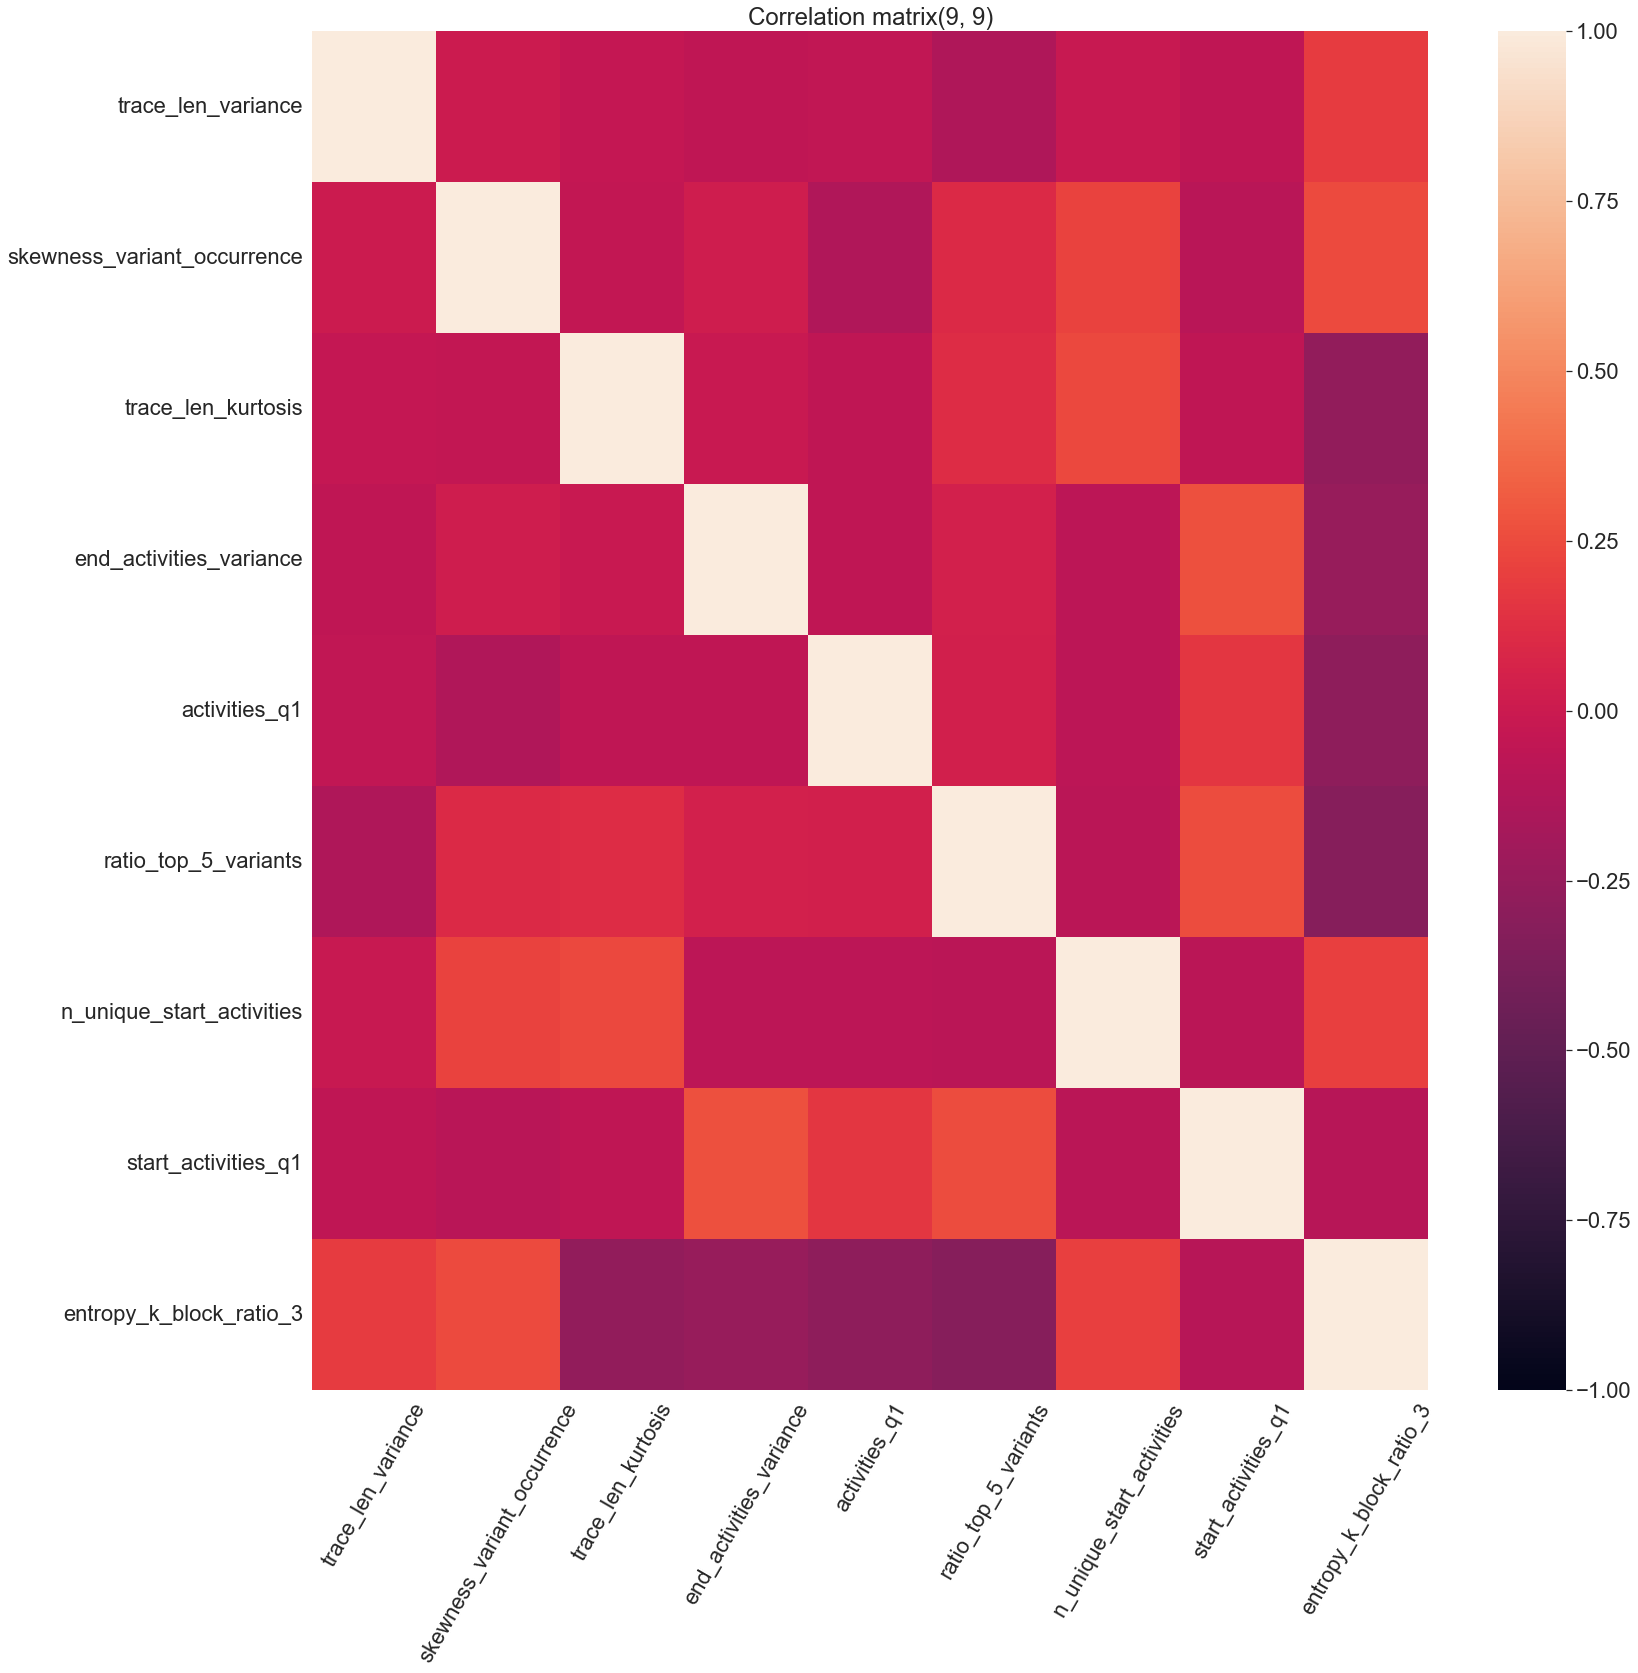

,trace_len_variance,skewness_variant_occurrence,trace_len_kurtosis,end_activities_variance,activities_q1,ratio_top_5_variants,n_unique_start_activities,start_activities_q1,entropy_k_block_ratio_3
trace_len_variance,1.000000,0.001058,-0.035629,-0.057748,-0.052351,-0.135223,-0.017012,-0.054981,0.181886
skewness_variant_occurrence,0.001058,1.000000,-0.039244,0.017766,-0.127901,0.100025,0.213169,-0.093247,0.242279
trace_len_kurtosis,-0.035629,-0.039244,1.000000,-0.008661,-0.056214,0.116795,0.240436,-0.062203,-0.270557
end_activities_variance,-0.057748,0.017766,-0.008661,1.000000,-0.060095,0.041292,-0.074782,0.268969,-0.247360
activities_q1,-0.052351,-0.127901,-0.056214,-0.060095,1.000000,0.036713,-0.076146,0.162243,-0.281636
ratio_top_5_variants,-0.135223,0.100025,0.116795,0.041292,0.036713,1.000000,-0.085927,0.255217,-0.324091
n_unique_start_activities,-0.017012,0.213169,0.240436,-0.074782,-0.076146,-0.085927,1.000000,-0.079961,0.202574
start_activities_q1,-0.054981,-0.093247,-0.062203,0.268969,0.162243,0.255217,-0.079961,1.000000,-0.100364
entropy_k_block_ratio_3,0.181886,0.242279,-0.270557,-0.247360,-0.281636,-0.324091,0.202574,-0.100364,1.000000


In [7]:
filter_feats = select_least_corr_features(scaled_dmf, num_features=9)
# print(filter_feats)
# #set(filter_feats).isin(set(scaled_dmf.columns))
scaled_dmf[filter_feats]
plot_miner_correlation(scaled_dmf[filter_feats])